In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [2]:
using Random, Distributions, SpecialFunctions
using Plots, Measures
using LinearAlgebra

In [22]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .PlotDistributions

# Distributions

In [31]:
# Set global parameters
N_species = 500
Δt = 0.01
n = 250000
skip = 500
ϵ = 1e-1
max_lag = Int64(floor(n / skip / 10))
miss = Int64(floor(n / skip / 10)) # perform analysis for those species for which n. of missing entries is <= miss
miss = 0
lags = [0, 2, 5, 10];

### Stochastic Logistic model

In [5]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 100 .* rand(LogNormal(), N_species)
# Pass y0 = K to the model so it is already at staedy state

# Solve model
data = GenerativeModels.logistic_growth(N_species, K, Δt, n; r=1.0, K=K, σ=1.0, ε=ϵ, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 0


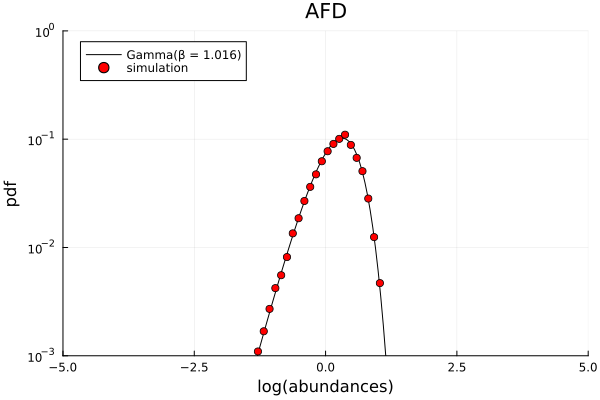

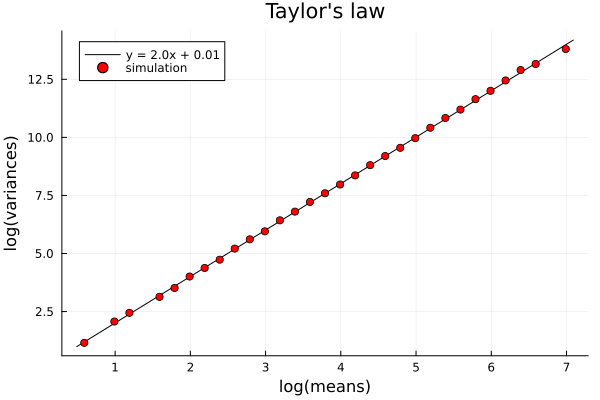

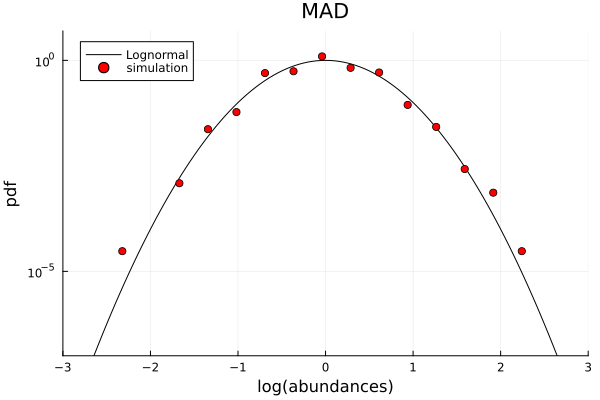

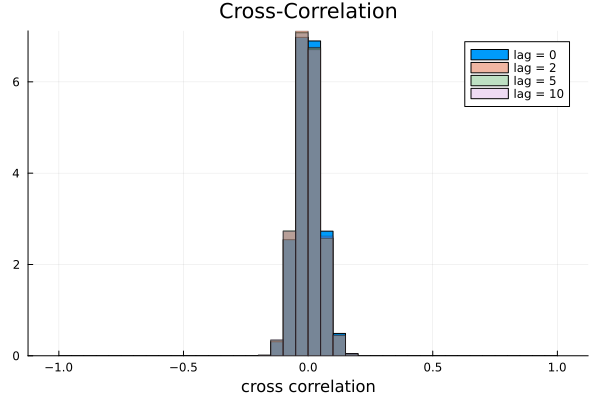

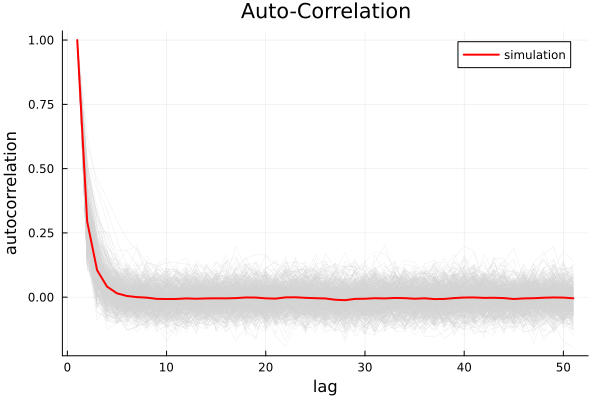

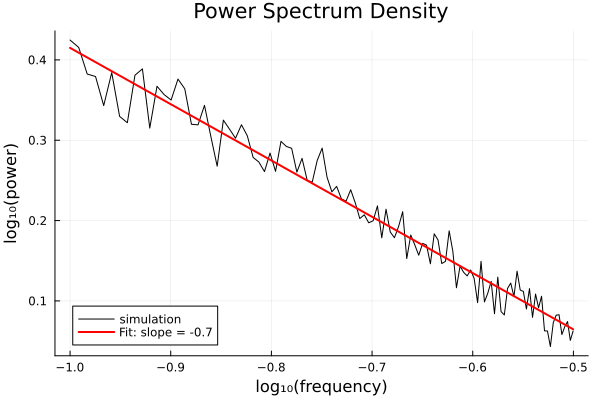

In [6]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLM_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLM_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLM_MAD.png")
display(crosscorr["fig"])
# savefig("./Images/SLM_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/SLM_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLM_PSD.png")

### Stochastic Lotka Volterra

In [32]:
Random.seed!(1234)

# Set conditions for temporal analysis
K = 1000 .* rand(LogNormal(), N_species)
ρ = 1 / (N_species)
A = GenerativeModels.sparse_gaussian_matrix(K, ρ; μ=-2/N_species, σ=1/N_species)

# Solve model
data = GenerativeModels.lotka_volterra(N_species, K, Δt, n; r=1.0, A=Matrix(A), σ=1.0, ε=ϵ, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

A

Extincted species: 150


500×500 SparseArrays.SparseMatrixCSC{Float64, Int64} with 994 stored entries:
⎡⠑⢄⠈⠀⠀⠀⢀⠀⠀⠀⠀⡀⠀⠀⠀⠈⠀⠀⠈⠀⠀⠂⠀⠄⢊⠐⠀⠐⠀⠀⠂⠠⠄⠀⠒⠠⠀⠀⡈⠀⎤
⎢⠀⠀⠑⣄⠀⠐⠀⠀⠀⠀⠀⠀⠀⠂⠁⢁⠀⠤⠀⠀⠈⢘⠌⠀⠀⢀⠀⢀⠀⠁⠀⠀⠀⠀⠀⠀⢀⠁⠈⠀⎥
⎢⠀⡀⢀⠀⠱⢄⠀⠀⠐⠂⠀⠁⠀⠄⠀⠀⠀⠈⠀⡀⠑⠀⠀⠠⠀⢀⠄⡀⠐⠀⠀⠀⠀⠀⠄⠡⢂⠈⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠱⢄⠀⠀⠀⠈⠀⠀⠀⠀⠁⠀⠀⠈⠀⠀⠀⠈⠀⠀⠀⠄⠀⠁⠀⠀⢀⢄⠀⠐⠀⠉⠀⠀⎥
⎢⠀⠀⢈⠄⠀⠂⠀⠀⠑⢆⠀⠀⠀⡂⠀⡁⠀⠁⠀⠀⠀⠀⠄⠃⠁⠀⠈⠀⠐⠈⠀⠀⠀⠠⠀⠨⠈⠀⢉⡀⎥
⎢⠀⢄⡠⠀⠀⠘⠈⡀⠈⡀⠑⢄⣂⠀⠀⠀⠀⠁⠤⠀⠐⠨⢁⠄⠀⠂⠀⠣⠀⠀⢅⠀⠈⠠⠂⠀⠀⠀⠄⠀⎥
⎢⠀⠈⡀⠁⠊⠀⠀⠀⠀⠠⠀⠠⠑⢆⠀⠀⠀⠐⠀⠃⠄⠂⠉⠂⠀⠀⠀⠀⠂⠄⠀⠠⠀⣀⠀⠂⠀⠀⡀⠀⎥
⎢⠀⡀⠀⠀⠈⠀⠀⠀⠀⣠⠀⠄⡀⠀⠱⢄⠀⠠⠀⠀⠠⠂⠀⡈⠀⠀⡀⠀⠀⠙⠈⡐⠄⠀⠀⡄⠀⠀⠀⠉⎥
⎢⠀⠰⠅⠀⠈⠐⠐⡀⠃⠀⠀⠐⢑⠀⠀⠀⠑⢔⠀⠐⠄⡀⠀⠀⠊⠙⠁⠀⠄⠀⠀⠀⠀⠈⠀⠀⠐⠀⠄⢂⎥
⎢⠀⠃⠀⡀⠀⠁⠂⠤⠀⡀⠀⠀⠩⠐⠄⠢⠀⠀⠱⣄⠀⢈⡘⠀⠀⠀⠀⠊⠂⠀⠀⠀⠄⠀⠴⠀⠀⠁⠀⠀⎥
⎢⢀⠤⠄⠀⠀⠉⠀⠀⡀⠀⠀⠘⠀⠂⠀⠀⠀⠀⠈⠊⠑⢆⠰⠠⠀⠀⠢⠠⠀⠂⠀⠐⠠⠀⠀⠄⠂⢠⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠈⠄⠀⠐⠀⠨⠀⠀⡀⠄⠀⠐⢀⠀⠀⠀⠑⢅⠑⠁⡈⠄⠀⠀⠀⢊⠀⠈⠂⠀⠀⠠⠀⡀⎥
⎢⠄⢀⠀⠤⠑⠄⠀⠐⠘⠀⠀⢠⠀⠈⢀⠀⠀⠀⠠⢂⠈⠂⠂⠀⠑⢄⠈⠈⠀⠀⠀⠀⠀⠀⡂⠀⠁⠀⠀⠀⎥
⎢⠠⠀⠁⢐⠀⠀⠀⠀⠃⠀⠀⡀⠀⠀⠀⠁⢀⠀⠌⠀⠈⠠⠄⠈⠡⠀⠱⣤⠂⠀⠀⠀⠐⠀⠀⡂⠀⠀⠀⠐⎥
⎢⠀⠀⠀⢰⠐⠀⠀⠁⠀⡀⠀⠀⠀⠌⡈⠀⠂⠀⠀⠀⠐⠃⠃⠀⡀⡀⠒⠀⠑⢄⠄⠀⠂⠀⠀⠀⠀⠂⠀⡀⎥
⎢⠀⠠⠀⢠⡀⠀⠀⢠⠃⠀⠀⠀⠀⠀⢀⠄⠀⢠⠠⠄⠠⠊⡀⠀⠀⠀⠀⠊⠀⠀⠑⢄⠀⠁⠀⠠⠀⡠⠀⠂⎥
⎢⠀⠀⠦⠡⠀⠠⠀⠀⠂⠀⠀⠁⠀⠡⠀⠀⠈⠂⠀⠂⠀⠀⠀⠀⠀⢁⠀⠁⠀⠀⠠⠀⠱⢄⠂⠀⠀⠀⠀⠀⎥
⎢⠈⠠⠁⠀⠀⠄⠂⠄⡀⠀⠀⠀⡀⡀⠀⠀⡄⠀⠀⠄⡀⠀⠀⠈⠐⠄⠀⠀⠀⠀⠐⠄⠀⠈⠑⣄⠀⠐⠢⠀⎥
⎢⠀⠁⠦⠀⠀⠀⠀⠁⠐⢈⠀⠄⠀⠀⠂⠁⠀⠁⠠⠀⠄⠀⠀⠀⠆⠀⠀⠀⢂⠀⠇⠀⠀⠀⠀⠀⡑⢤⠀⠉⎥
⎣⠀⠀⠈⠀⠀⠀⠈⠀⠄⠀⠀⡀⠀⠀⠁⠀⢀⠀⠀⠀⠀⠉⠀⠐⠀⠀⠀⢀⠀⠀⠀⠈⠈⠀⠠⠀⠀⠈⠑⢄⎦

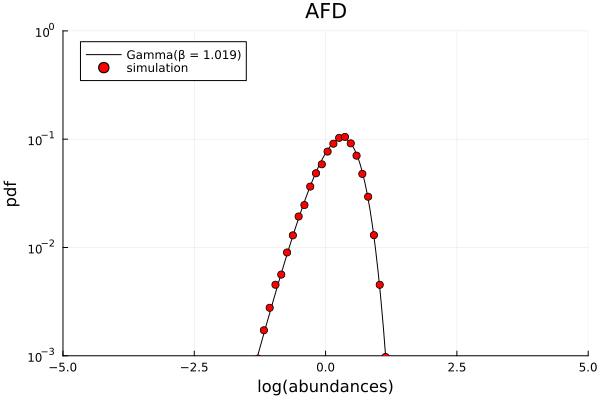

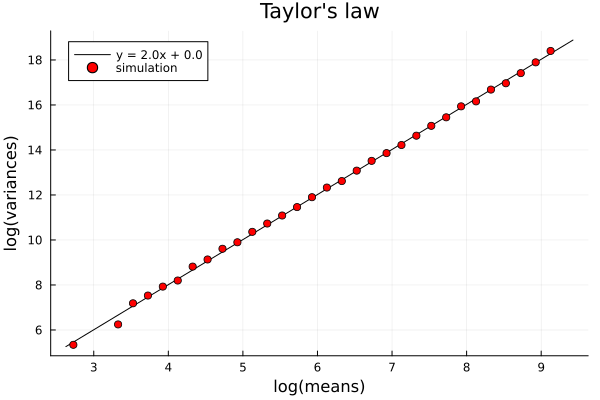

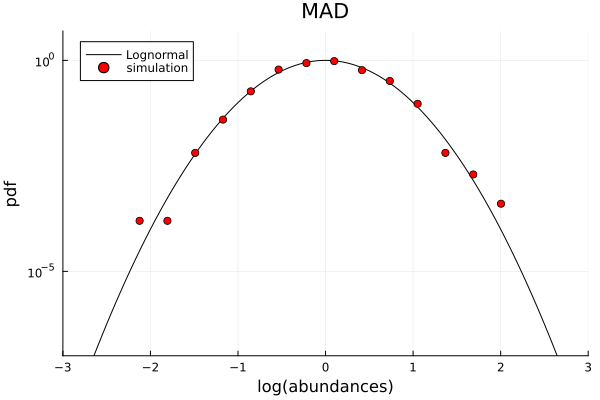

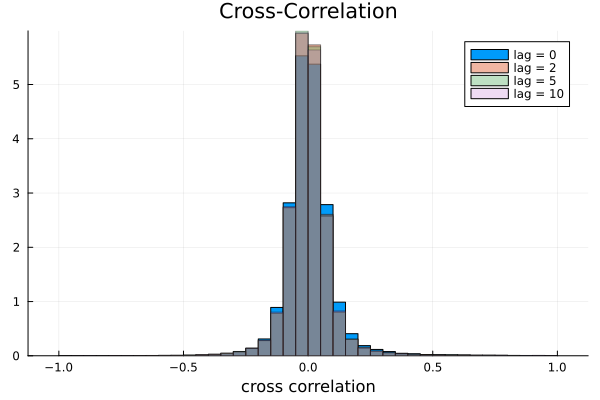

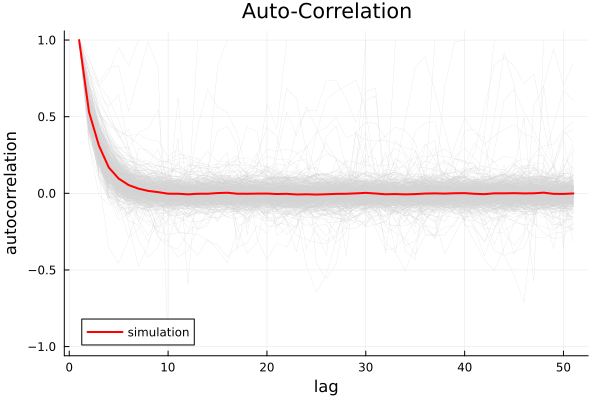

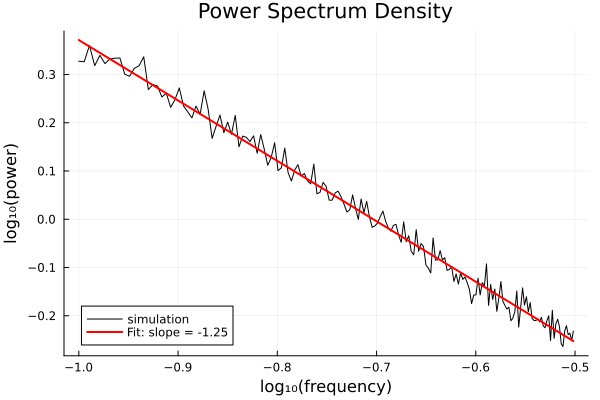

In [33]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLV_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLV_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLV_MAD.png")
display(crosscorr["fig"])
# savefig("./Images/SLV_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/SLV_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLV_PSD.png")

### Stochastic Exponential Growth

In [34]:
Random.seed!(1234)

# Set conditions for temporal analysis
y0 = 100 .* rand(N_species)

# Solve model
data = GenerativeModels.exp_growth(N_species, y0, Δt, n; σ=1.0, p=0.5, ε=ϵ, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 30


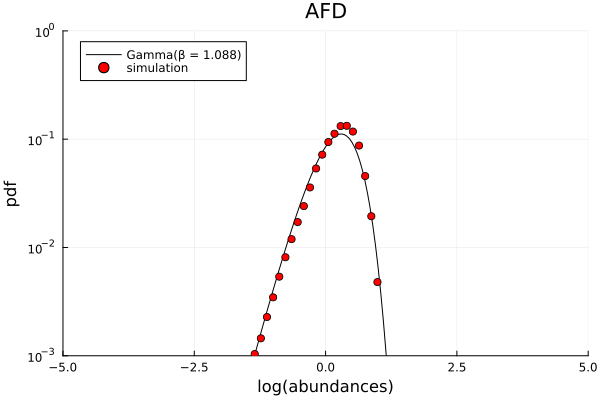

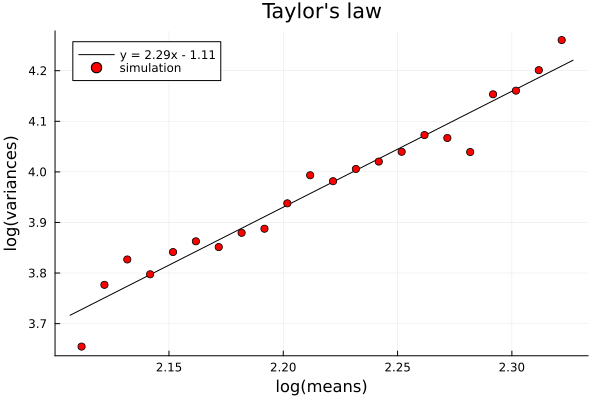

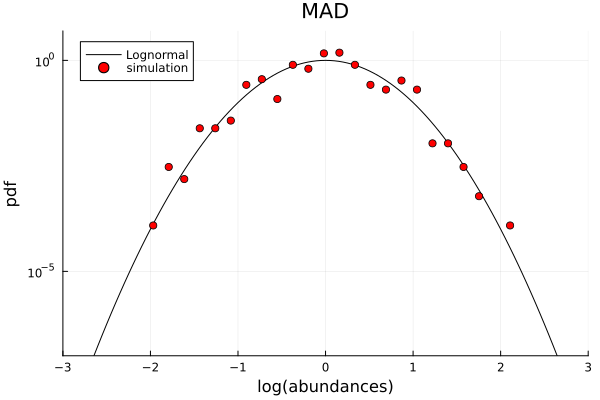

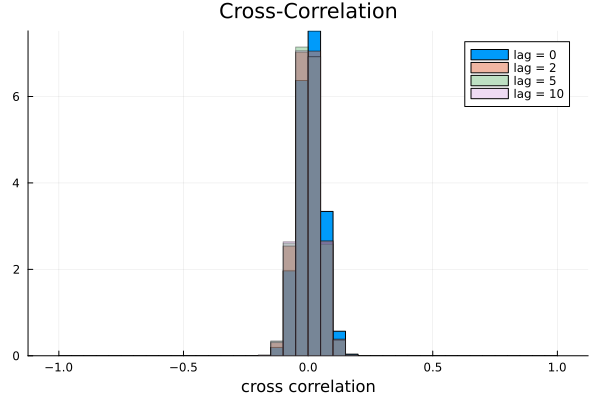

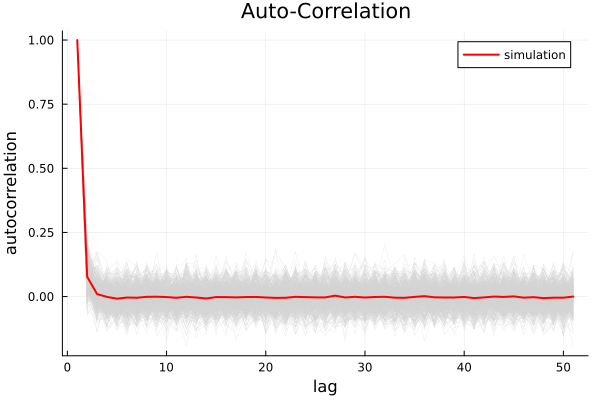

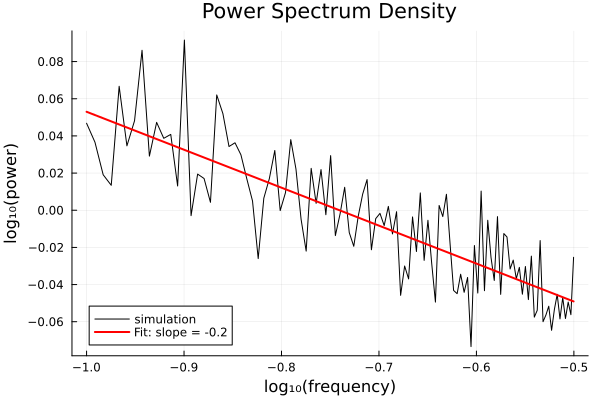

In [35]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.01, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.01, plot_fig=true, plot_title="MAD", data_label="simulation")
crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/exp_AFD.png")
display(taylor["fig"])
# savefig("./Images/exp_Taylor.png")
display(mad["fig"])
# savefig("./Images/exp_MAD.png")
display(crosscorr["fig"])
# savefig("./Images/exp_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/exp_autocorr.png")
display(psd["fig"])
# savefig("./Images/exp_PSD.png")

### Statistical model

In [36]:
Random.seed!(1234)

# Set conditions for temporal analysis
mean_abs = rand(LogNormal(), N_species)

# Solve model
data = GenerativeModels.stat_model(N_species, n; β=1.0, mean_abs=mean_abs, ε=ϵ, skip=skip)
println("Extincted species: ", count(iszero.(data[end,:])))

Extincted species: 64


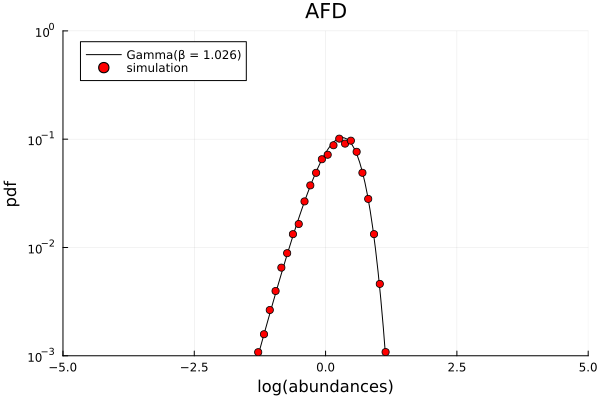

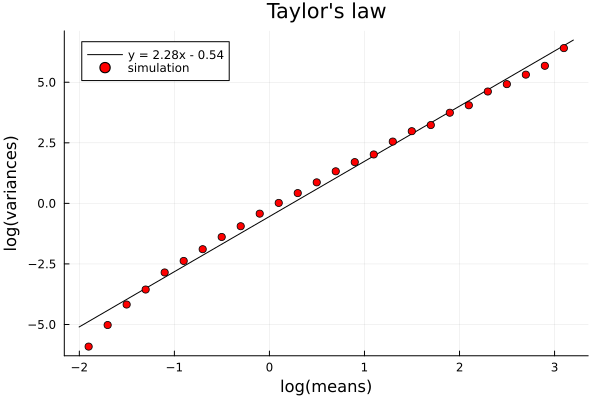

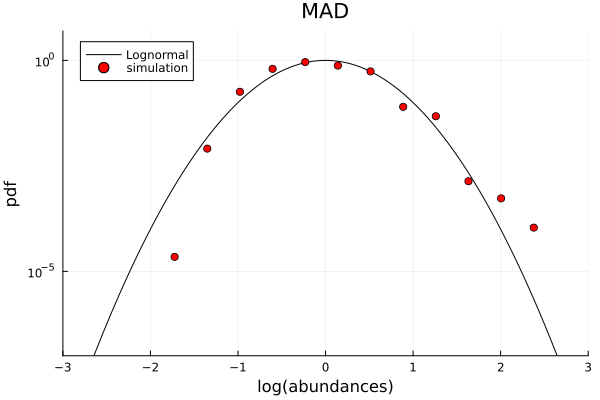

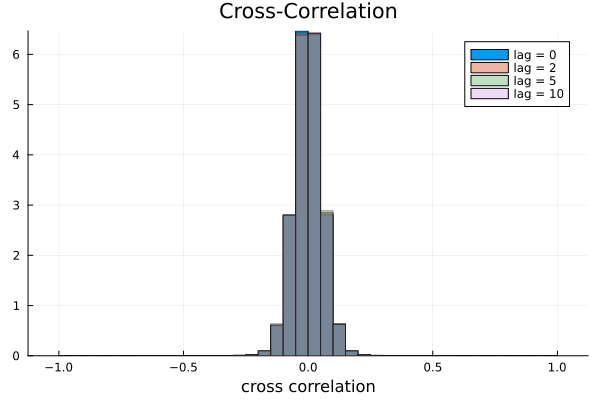

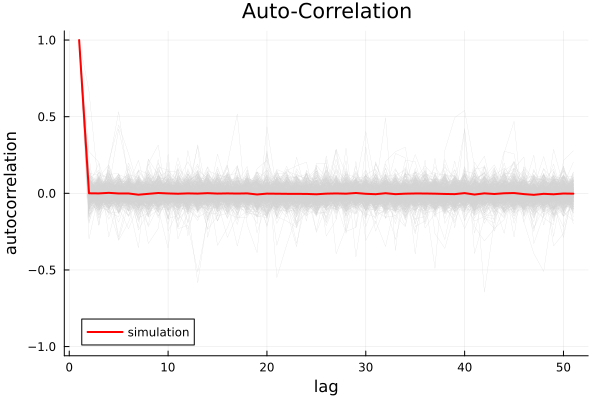

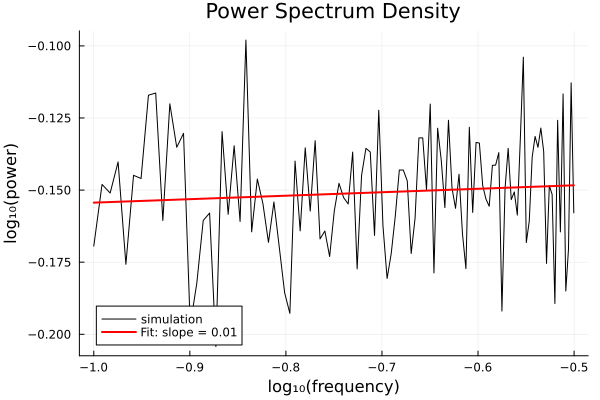

In [37]:
# Compute distributions
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
crosscorr = PlotDistributions.make_lagCrossCorr(data; Δb=0.05, missing_thresh=miss, lags=lags, make_log=true, plot_fig=true, plot_title="Cross-Correlation")
lagcorr = PlotDistributions.make_lagCorr(data; missing_thresh=miss, max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Auto-Correlation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; missing_thresh=miss, freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/StatModel_AFD.png")
display(taylor["fig"])
# savefig("./Images/StatModel_Taylor.png")
display(mad["fig"])
# savefig("./Images/StatModel_MAD.png")
display(crosscorr["fig"])
# savefig("./Images/StatModel_crosscorr.png")
display(lagcorr["fig"])
# savefig("./Images/StatModel_autocorr.png")
display(psd["fig"])
# savefig("./Images/StatModel_PSD.png")